## Manifold Learning(다양체 학습)
+ 높은 차원의 데이터를 저차원으로 축소하는 방법  
    => 2,3차원으로 시각화 가능, 데이터 정제에 활용 가능

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [4]:
s_curve, color = datasets.make_s_curve(1000, random_state=2)

digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=2)
projected_digits = rand_proj.fit_transform(digits)

In [10]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [7]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection=='3d':
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4,-72)
    elif projection=='2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:,0], s_curve[:,1], c=color, cmap=plt.cm.Spectral)

In [8]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection=='3d':
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]),
                    color=plt.cm.Set1(labels[i]/10), fontdict={'weight':'bold', 'size':10})
        ax.view_init(4,-72)
    elif projection=='2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], str(labels[i]),
                    color=plt.cm.Set1(labels[i]/10), fontdict={'weight':'bold', 'size':10})

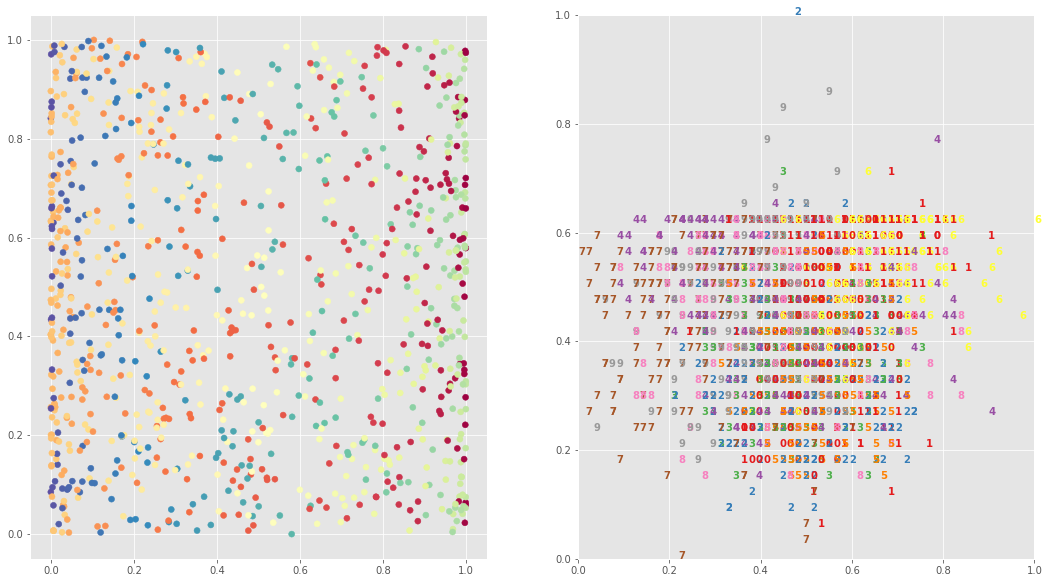

In [12]:
fig = plt.figure(figsize=(18,10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

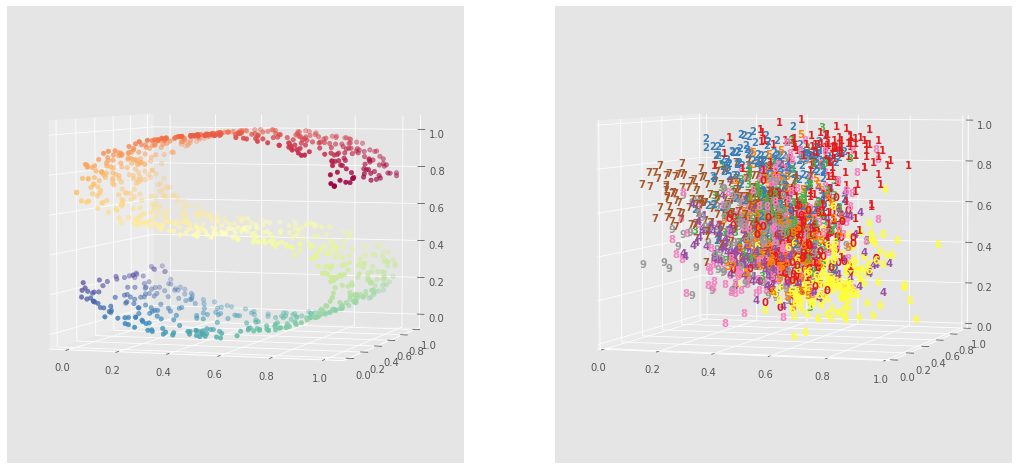

In [11]:
fig = plt.figure(figsize=(18,10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

### 3차원 => 2차원으로 차원축소 할 때, 정보의 손실이 생기게 되는데  
### 정보손실을 최소화하기 위한 방법을 잘 선택해야 한다.

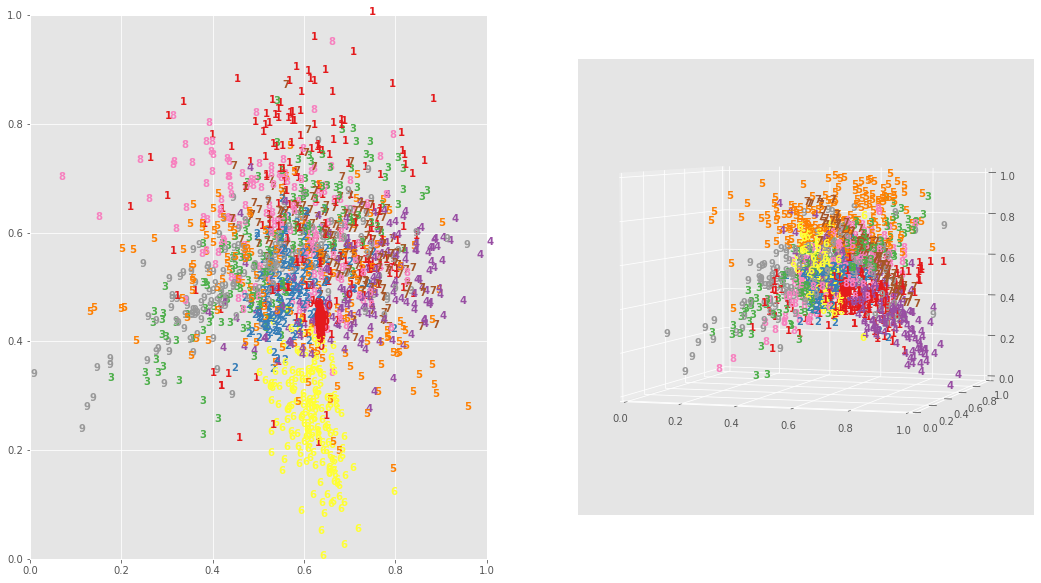

In [48]:
#LLE(Locally Linear Embedding) : 국소 이웃거리를 보존하는 저차원 임베딩을 찾음


digits_lle2 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=2, 
                                             method='standard', 
                                             random_state=2).fit_transform(digits)
digits_lle3 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=3, 
                                             method='standard', 
                                             random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_lle2, labels, 121, '2d')
plot_digits(digits_lle3, labels, 122, '3d')

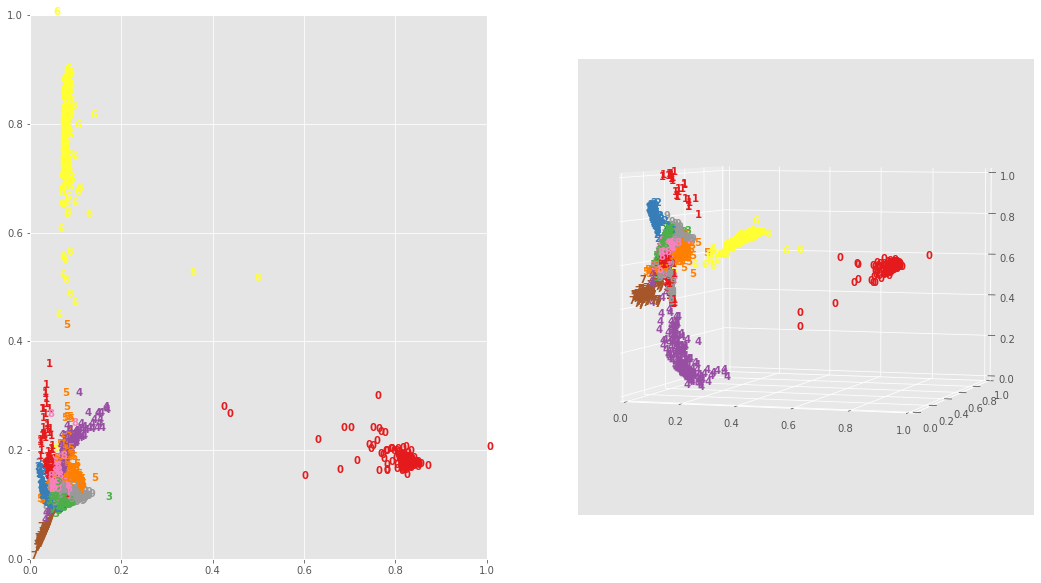

In [49]:
#LTSA(Local Tangent Space Alignment) : 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화 => 국소 탄젠트 공간을 정렬

digits_ltsa2 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=2, 
                                             method='ltsa', 
                                             random_state=2).fit_transform(digits)
digits_ltsa3 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=3, 
                                             method='ltsa', 
                                             random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_ltsa2, labels, 121, '2d')
plot_digits(digits_ltsa3, labels, 122, '3d')

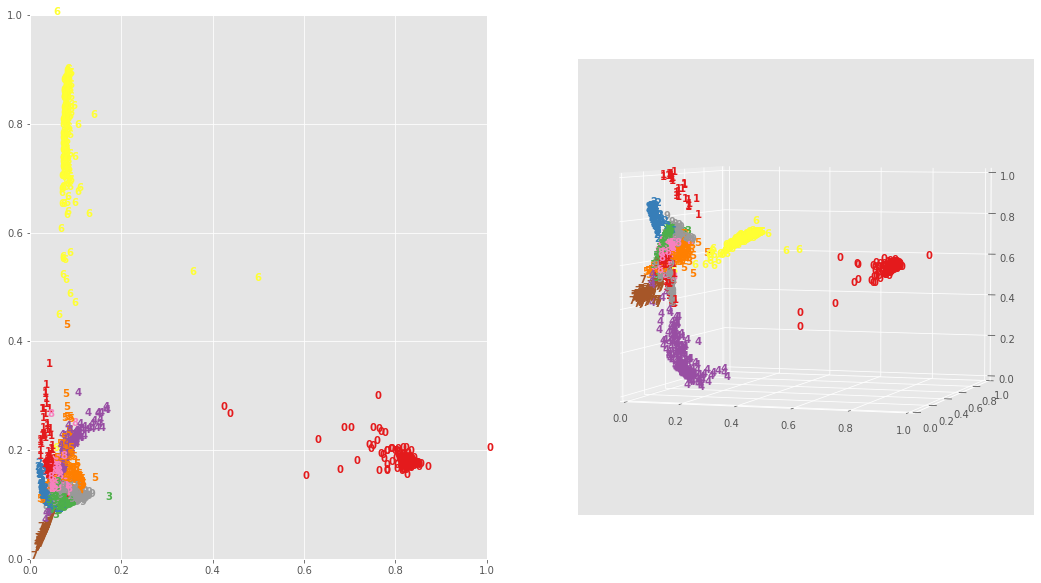

In [50]:
#Hessian LLE : LLE의 문제 해결

digits_hlle2 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=2, 
                                             method='hessian', 
                                             random_state=2).fit_transform(digits)
digits_hlle3 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=3, 
                                             method='hessian', 
                                             random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_hlle2, labels, 121, '2d')
plot_digits(digits_hlle3, labels, 122, '3d')

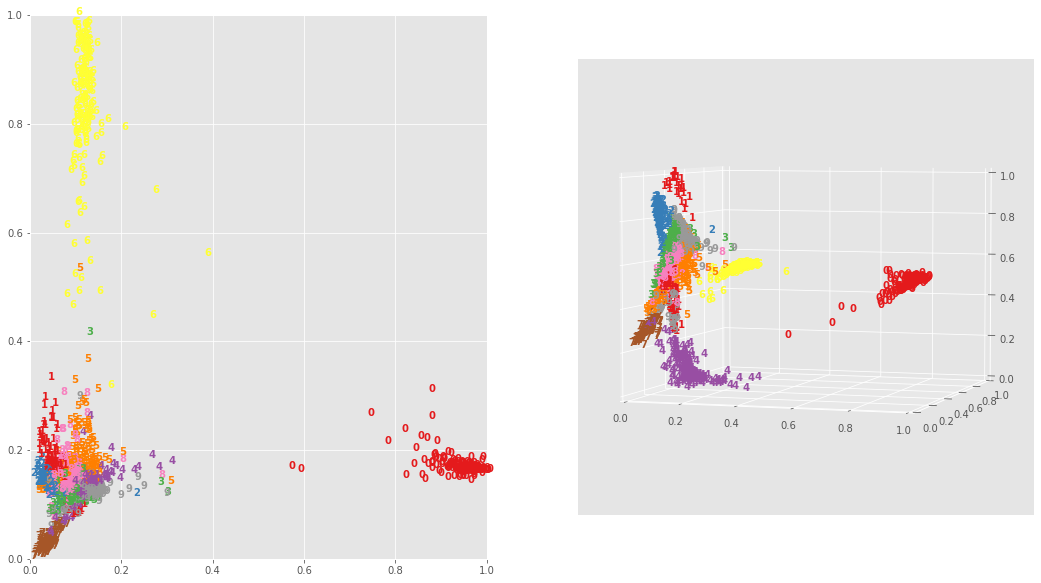

In [54]:
#Modified LLE : 각 이웃에 여러 가중치 벡터 사용, n_neighbors > n_components여야함

digits_mlle2 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=2, 
                                             method='modified', 
                                             random_state=2).fit_transform(digits)
digits_mlle3 = manifold.LocallyLinearEmbedding(n_neighbors=30, 
                                             n_components=3, 
                                             method='modified', 
                                             random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_mlle2, labels, 121, '2d')
plot_digits(digits_mlle3, labels, 122, '3d')

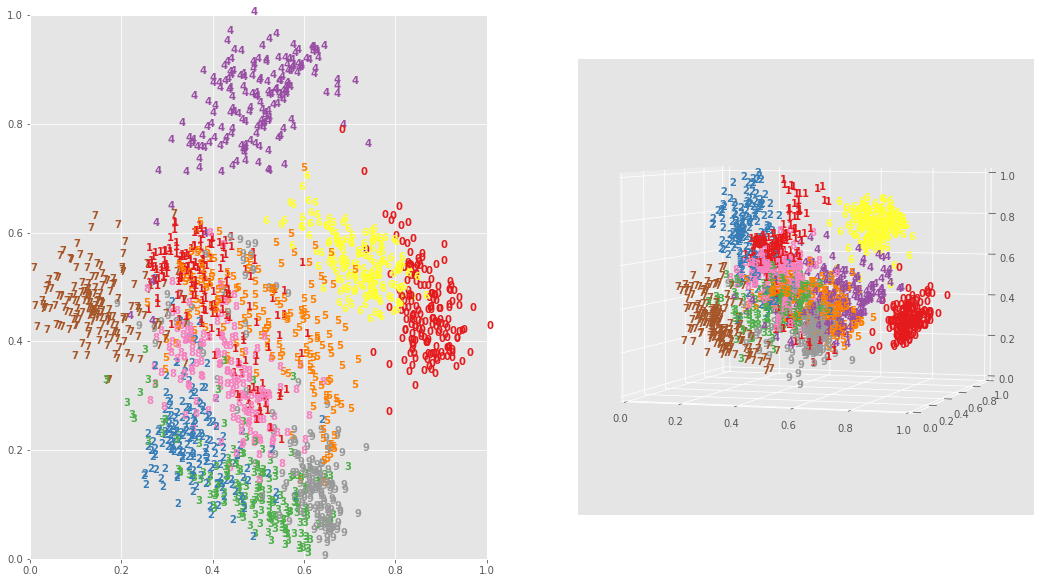

In [56]:
#Isomap : 초기의 manifold 학습 알고리즘, 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

digits_isomap2 = manifold.Isomap(n_neighbors=30, 
                                n_components=2).fit_transform(digits)
digits_isomap3 = manifold.Isomap(n_neighbors=30, 
                                n_components=3).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_isomap2, labels, 121, '2d')
plot_digits(digits_isomap3, labels, 122, '3d')

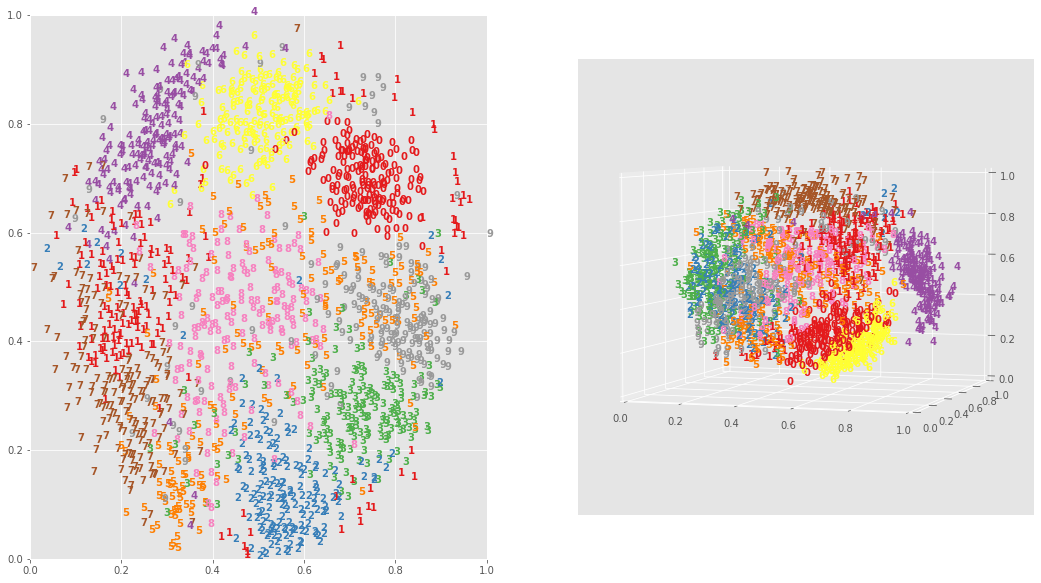

In [57]:
#MDS(Multi-Dimensional Scaling) : 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

digits_mds2 = manifold.MDS(n_components=2, random_state=2).fit_transform(digits)
digits_mds3 = manifold.MDS(n_components=3, random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_mds2, labels, 121, '2d')
plot_digits(digits_mds3, labels, 122, '3d')

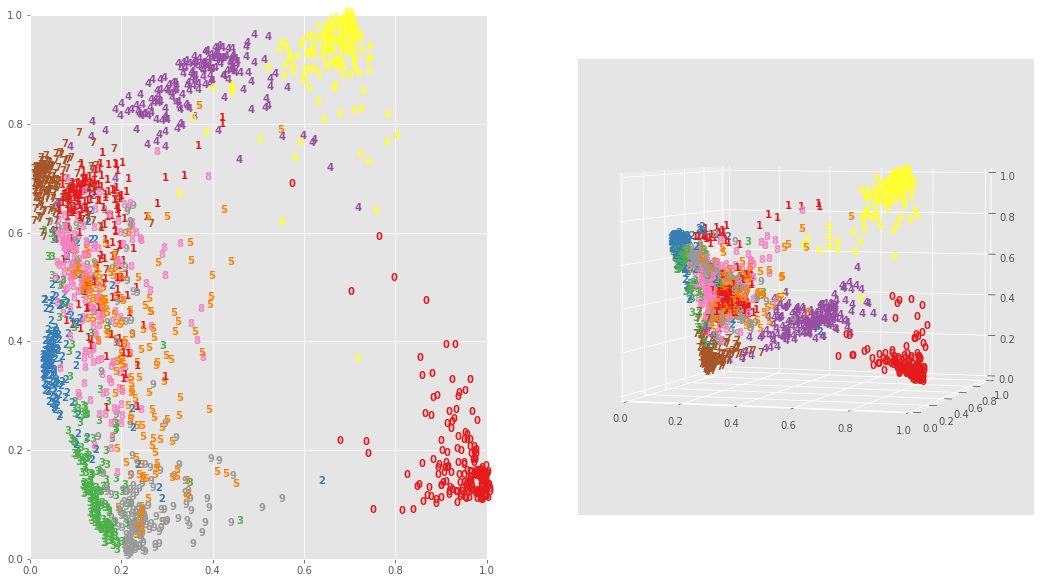

In [58]:
#SE(Spectral Embedding) : 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음, 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

digits_se2 = manifold.SpectralEmbedding(n_components=2, random_state=2).fit_transform(digits)
digits_se3 = manifold.SpectralEmbedding(n_components=3, random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_se2, labels, 121, '2d')
plot_digits(digits_se3, labels, 122, '3d')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.p

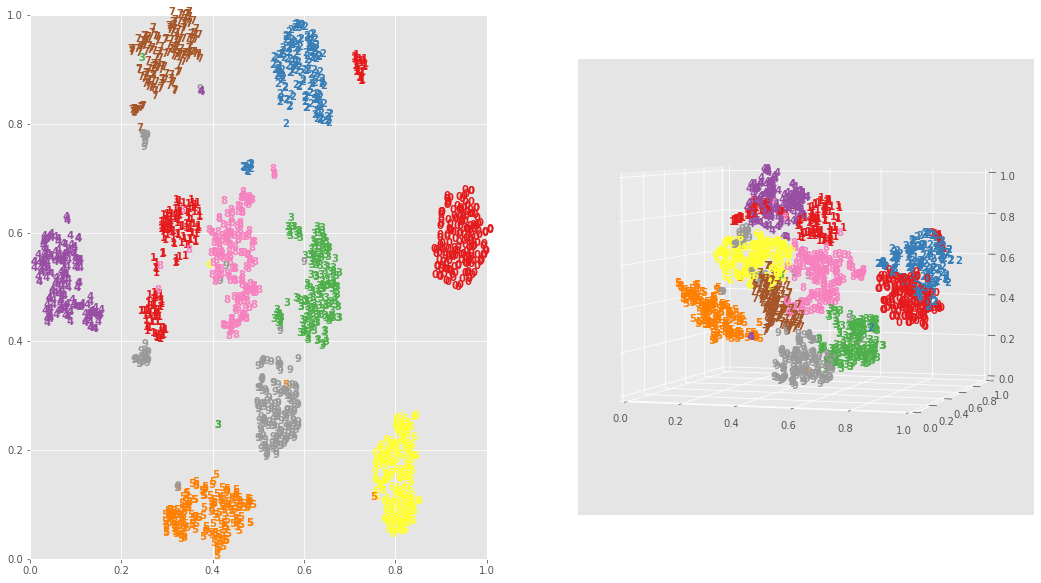

In [59]:
#T-SNE(T-Distributed Stochastic Neighbor Embedding) 
#비교적 최신 알고리즘으로, 데이터 포인트의 유사성을 확률로 변환

digits_tsne2 = manifold.TSNE(n_components=2, random_state=2).fit_transform(digits)
digits_tsne3 = manifold.TSNE(n_components=3, random_state=2).fit_transform(digits)

plt.figure(figsize=(18,10))
plot_digits(digits_tsne2, labels, 121, '2d')
plot_digits(digits_tsne3, labels, 122, '3d')

## 정제된 표현을 이용한 학습
+ manifold 학습의 결과도 정제된 데이터로 생각할 수 있음
+ 정제된 표현이기 때문에 분석에 비교적 용이함  
    => 머신러닝 모델의 입력으로 사용했을 때 성능향상을 기대할 수 있음

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [42]:
raw_digits, target = datasets.load_digits(return_X_y=True)

knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [45]:
#정제 전
knn_score = cross_val_score(estimator=knn,
                        X=raw_digits, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=raw_digits, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=raw_digits, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=raw_digits, y=target,
                        cv=10)

print(f'KNN\n교차검증 점수 : {knn_score.mean()} +- {knn_score.std()}\n')
print(f'SVM\n교차검증 점수 : {svm_score.mean()} +- {svm_score.std()}\n')
print(f'Decision Tree\n교차검증 점수 : {dt_score.mean()} +- {dt_score.std()}\n')
print(f'Random Forest\n교차검증 점수 : {rf_score.mean()} +- {rf_score.std()}')

KNN
교차검증 점수 : 0.9710738671632526 +- 0.01716903805698193

SVM
교차검증 점수 : 0.9699503414028554 +- 0.021423935130151475

Decision Tree
교차검증 점수 : 0.8241216635630042 +- 0.04021737755796759

Random Forest
교차검증 점수 : 0.9465797641216636 +- 0.023083548972582513


In [64]:
#정제 후(t-SNE) => 8가지 방법 중에 가장 큰 성능향상

knn_score = cross_val_score(estimator=knn,
                        X=digits_tsne2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_tsne2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_tsne2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_tsne2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_tsne3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_tsne3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_tsne3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_tsne3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.p

n_components = 2일 때
          KNN cv score : 0.9766356300434513 +- 0.02191460691070193
          SVM cv score : 0.9643854748603351 +- 0.02158023638382462
Decision Tree cv score : 0.9766325263811296 +- 0.01771297611071424
Random Forest cv score : 0.9810862818125388 +- 0.018628269161468664

n_components = 3일 때
          KNN cv score : 0.9838640595903166 +- 0.018336018038481793
          SVM cv score : 0.983860955927995 +- 0.018507411937090688
Decision Tree cv score : 0.9705058969584108 +- 0.021836672229467693
Random Forest cv score : 0.9860955927995034 +- 0.010895278272786038


In [67]:
#MDS

knn_score = cross_val_score(estimator=knn,
                        X=digits_mds2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_mds2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_mds2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_mds2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_mds3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_mds3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_mds3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_mds3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.7278988206083178 +- 0.049831280391896944
          SVM cv score : 0.7417628801986345 +- 0.045057445304824445
Decision Tree cv score : 0.6905990068280572 +- 0.03179382486920661
Random Forest cv score : 0.7328770949720671 +- 0.04401878885115565

n_components = 3일 때
          KNN cv score : 0.7952141527001862 +- 0.04647058528738053
          SVM cv score : 0.7974581005586592 +- 0.0324440400715632
Decision Tree cv score : 0.7089726877715704 +- 0.03115289657092102
Random Forest cv score : 0.7807697082557419 +- 0.045858648249403416


In [68]:
#LLE

knn_score = cross_val_score(estimator=knn,
                        X=digits_lle2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_lle2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_lle2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_lle2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_lle3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_lle3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_lle3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_lle3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.4412507759155804 +- 0.07172570669084896
          SVM cv score : 0.4729702048417132 +- 0.05836200845168812
Decision Tree cv score : 0.3844785847299813 +- 0.041844407036612116
Random Forest cv score : 0.42231843575419 +- 0.05684329106418133

n_components = 3일 때
          KNN cv score : 0.6165580384854128 +- 0.050077587710920475
          SVM cv score : 0.6210304158907511 +- 0.04547779613722025
Decision Tree cv score : 0.5441868404717567 +- 0.05190584398941749
Random Forest cv score : 0.6071135940409683 +- 0.041564664357392415


In [69]:
#LTSA

knn_score = cross_val_score(estimator=knn,
                        X=digits_ltsa2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_ltsa2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_ltsa2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_ltsa2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_ltsa3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_ltsa3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_ltsa3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_ltsa3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.8080105524518932 +- 0.04933142425664781
          SVM cv score : 0.7835567970204842 +- 0.06004903715564944
Decision Tree cv score : 0.7724177529484791 +- 0.047636460920350406
Random Forest cv score : 0.8080105524518932 +- 0.040206484435621886

n_components = 3일 때
          KNN cv score : 0.8831626319056488 +- 0.03726982922892784
          SVM cv score : 0.8369584109248913 +- 0.05511334919548635
Decision Tree cv score : 0.8514432029795159 +- 0.03907935898459286
Random Forest cv score : 0.8809404096834264 +- 0.052907357813307694


In [70]:
#HLLE

knn_score = cross_val_score(estimator=knn,
                        X=digits_hlle2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_hlle2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_hlle2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_hlle2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_hlle3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_hlle3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_hlle3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_hlle3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.8057883302296709 +- 0.045264501763293476
          SVM cv score : 0.7835599006828058 +- 0.06060831598728117
Decision Tree cv score : 0.7779857231533208 +- 0.04112485398930166
Random Forest cv score : 0.81024208566108 +- 0.039722503250776316

n_components = 3일 때
          KNN cv score : 0.885384854127871 +- 0.04002692703149011
          SVM cv score : 0.838631284916201 +- 0.05407241621469583
Decision Tree cv score : 0.840350713842334 +- 0.058201772992454444
Random Forest cv score : 0.8798324022346368 +- 0.052894153254719266


In [72]:
#Isomap

knn_score = cross_val_score(estimator=knn,
                        X=digits_isomap2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_isomap2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_isomap2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_isomap2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_isomap3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_isomap3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_isomap3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_isomap3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.7195375543140906 +- 0.03596343118985757
          SVM cv score : 0.7640689013035382 +- 0.04261059145084091
Decision Tree cv score : 0.6828150217256364 +- 0.045864810458156
Random Forest cv score : 0.7250962135319676 +- 0.046710908180590954

n_components = 3일 때
          KNN cv score : 0.8514028553693359 +- 0.03835105951209024
          SVM cv score : 0.8608597144630664 +- 0.03868820703982202
Decision Tree cv score : 0.796334574798262 +- 0.05041849232259874
Random Forest cv score : 0.8491775294847921 +- 0.030417183652324424


In [71]:
# MLLE

knn_score = cross_val_score(estimator=knn,
                        X=digits_mlle2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_mlle2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_mlle2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_mlle2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_mlle3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_mlle3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_mlle3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_mlle3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.7050962135319677 +- 0.04845817627164449
          SVM cv score : 0.7028522656734948 +- 0.03784493753702535
Decision Tree cv score : 0.665046554934823 +- 0.04701668546297437
Random Forest cv score : 0.7056734947237742 +- 0.050260471898711426

n_components = 3일 때
          KNN cv score : 0.8798261949099938 +- 0.04549493650561462
          SVM cv score : 0.8174922408441961 +- 0.037691883193950636
Decision Tree cv score : 0.8503258845437618 +- 0.03883516126509052
Random Forest cv score : 0.8842644320297953 +- 0.04195437463818213


In [73]:
#SE

knn_score = cross_val_score(estimator=knn,
                        X=digits_se2, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_se2, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_se2, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_se2, y=target,
                        cv=10)
print('n_components = 2일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

knn_score = cross_val_score(estimator=knn,
                        X=digits_se3, y=target,
                        cv=10)
svm_score = cross_val_score(estimator=svm,
                        X=digits_se3, y=target,
                        cv=10)
dt_score = cross_val_score(estimator=dt,
                        X=digits_se3, y=target,
                        cv=10)
rf_score = cross_val_score(estimator=rf,
                        X=digits_se3, y=target,
                        cv=10)
print('\nn_components = 3일 때')
print(f'          KNN cv score : {knn_score.mean()} +- {knn_score.std()}')
print(f'          SVM cv score : {svm_score.mean()} +- {svm_score.std()}')
print(f'Decision Tree cv score : {dt_score.mean()} +- {dt_score.std()}')
print(f'Random Forest cv score : {rf_score.mean()} +- {rf_score.std()}')

n_components = 2일 때
          KNN cv score : 0.7629360645561764 +- 0.04348880129787405
          SVM cv score : 0.7551520794537554 +- 0.05938082453759544
Decision Tree cv score : 0.7139509621353197 +- 0.034437978247209906
Random Forest cv score : 0.7612631905648665 +- 0.045336385390445606

n_components = 3일 때
          KNN cv score : 0.8219118559900682 +- 0.051624414357110085
          SVM cv score : 0.8202327746741155 +- 0.05077844900486495
Decision Tree cv score : 0.7651117318435755 +- 0.04027896909176423
Random Forest cv score : 0.8319056486654253 +- 0.04735821984463605
